In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.feature_selection import RFECV,RFE
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

In [3]:
data_1=data.drop(['id','target'],axis=1)
data_1.head(2)
y_train=data['target']
data_test_1=data_test.drop(['id'],axis=1)

In [4]:
standard_scaler=StandardScaler()
data_1=standard_scaler.fit_transform(data_1)
data_test_1=standard_scaler.transform(data_test_1)
df_train=pd.DataFrame(data_1)
df_test=pd.DataFrame(data_test_1)

In [5]:
def feature_selection(model,X,y):
#     rfecv=RFECV(model,step=10,min_features_to_select=40,cv=best_cv,verbose=1,scoring='roc_auc',n_jobs=-1)
    rfecv=RFE(model,n_features_to_select=40,step=4,verbose=1)
    rfecv.fit(X,y)
    print("Optimal Feature",rfecv.n_features_)
    print("Feature_names",rfecv.get_feature_names_out())
    
    return rfecv.support_
    

In [6]:
earlystop = EarlyStopping(monitor='val_loss',min_delta=0.40, patience=3,verbose=1)

optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')

In [7]:
input1=df_train.shape[1]

model1 = keras.Sequential()

model1.add(keras.layers.Dense(16,input_dim=input1,activation="relu",kernel_initializer=tf.keras.initializers.he_normal(),
                           kernel_regularizer=tf.keras.regularizers.l1()))
model1.add(keras.layers.Dropout(0.4))

model1.add(keras.layers.Dense(8, activation="relu",kernel_initializer=tf.keras.initializers.he_normal(),
                            kernel_regularizer=tf.keras.regularizers.l1()))
model1.add(keras.layers.Dropout(0.4))

model1.add(keras.layers.Dense(1, activation="sigmoid",kernel_initializer=tf.keras.initializers.he_normal()))

model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                4816      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,961
Trainable params: 4,961
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_adam=model1.fit(x=df_train, y=y_train,batch_size=32,epochs=200,validation_split=0.2,callbacks=[earlystop],shuffle=True)

Epoch 1/200
7/7 [==============================] - 1s 28ms/step - loss: 4.1760 - accuracy: 0.5650 - val_loss: 3.4969 - val_accuracy: 0.5800
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 3.1920 - accuracy: 0.6400 - val_loss: 2.8683 - val_accuracy: 0.5800
Epoch 3/200
7/7 [==============================] - 0s 4ms/step - loss: 2.5629 - accuracy: 0.6800 - val_loss: 2.3742 - val_accuracy: 0.5800
Epoch 4/200
7/7 [==============================] - 0s 4ms/step - loss: 2.0959 - accuracy: 0.7300 - val_loss: 2.0113 - val_accuracy: 0.5800
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 1.7245 - accuracy: 0.7500 - val_loss: 1.7337 - val_accuracy: 0.6000
Epoch 6/200
7/7 [==============================] - 0s 4ms/step - loss: 1.4845 - accuracy: 0.7300 - val_loss: 1.5313 - val_accuracy: 0.6200
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 1.3130 - accuracy: 0.7200 - val_loss: 1.3685 - val_accuracy: 0.6600
Epoch 8/200
7/7 [=========

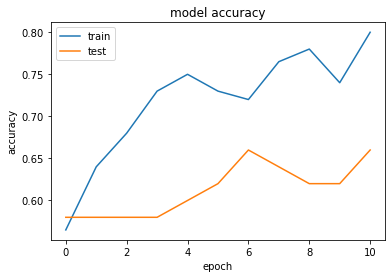

In [10]:
plt.plot(model_adam.history['accuracy'])
plt.plot(model_adam.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

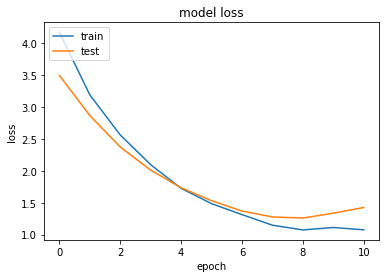

In [11]:
plt.plot(model_adam.history['loss'])
plt.plot(model_adam.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
pred1=model1.predict(df_test)

In [13]:
submit5=pd.read_csv("sample_submission.csv")
submit5['target']=pred1

x5=submit5.to_csv("mlp_adam_full.csv",index=False)

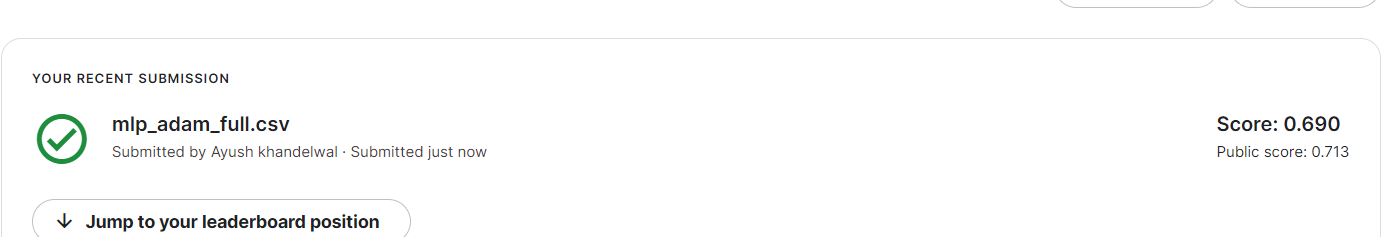

## RMS PROP

In [14]:
input1=df_train.shape[1]

model2 = keras.Sequential()

model2.add(keras.layers.Dense(16,input_dim=input1,activation="relu",kernel_initializer=tf.keras.initializers.he_normal(),
                           kernel_regularizer=tf.keras.regularizers.l1()))
model2.add(keras.layers.Dropout(0.4))

model2.add(keras.layers.Dense(8, activation="relu",kernel_initializer=tf.keras.initializers.he_normal(),
                            kernel_regularizer=tf.keras.regularizers.l1()))
model2.add(keras.layers.Dropout(0.4))

model2.add(keras.layers.Dense(1, activation="sigmoid",kernel_initializer=tf.keras.initializers.he_normal()))

model2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
optimizer_rms=tf.keras.optimizers.RMSprop(
    learning_rate=0.01,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07
)

In [16]:
model2.compile(optimizer=optimizer_rms, loss='binary_crossentropy', metrics=['accuracy'])

model_rms=model2.fit(x=df_train, y=y_train,batch_size=32,epochs=200,validation_split=0.2,callbacks=[earlystop],shuffle=True)

Epoch 1/200
7/7 [==============================] - 1s 28ms/step - loss: 3.6015 - accuracy: 0.5850 - val_loss: 2.8927 - val_accuracy: 0.4800
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 2.4988 - accuracy: 0.6000 - val_loss: 2.0995 - val_accuracy: 0.5600
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 1.8141 - accuracy: 0.6500 - val_loss: 1.7749 - val_accuracy: 0.5600
Epoch 4/200
7/7 [==============================] - 0s 4ms/step - loss: 1.5640 - accuracy: 0.6900 - val_loss: 1.5401 - val_accuracy: 0.5600
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 1.3427 - accuracy: 0.6600 - val_loss: 1.4205 - val_accuracy: 0.5600
Epoch 6/200
7/7 [==============================] - 0s 4ms/step - loss: 1.2664 - accuracy: 0.6800 - val_loss: 1.3716 - val_accuracy: 0.5600
Epoch 7/200
7/7 [==============================] - 0s 5ms/step - loss: 1.2511 - accuracy: 0.6650 - val_loss: 1.3569 - val_accuracy: 0.5600
Epoch 7: early stopping


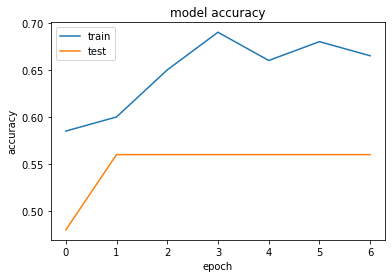

In [17]:
plt.plot(model_rms.history['accuracy'])
plt.plot(model_rms.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

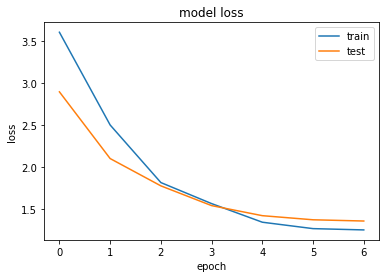

In [18]:
plt.plot(model_rms.history['loss'])
plt.plot(model_rms.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [19]:
pred2=model2.predict(df_test)

In [20]:
submit5=pd.read_csv("sample_submission.csv")
submit5['target']=pred2

x5=submit5.to_csv("mlp_rms_full.csv",index=False)

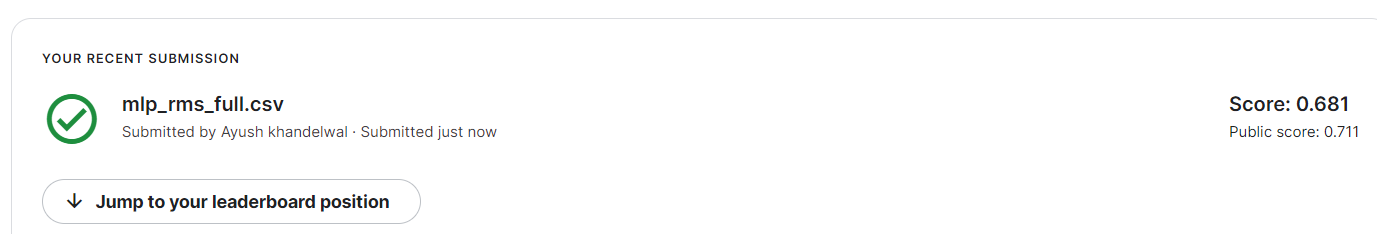

In [21]:
decision_tree=DecisionTreeClassifier()
best_cv=StratifiedKFold(n_splits=7)

rfecv=feature_selection(decision_tree,df_train,y_train)

Fitting estimator with 300 features.
Fitting estimator with 296 features.
Fitting estimator with 292 features.
Fitting estimator with 288 features.
Fitting estimator with 284 features.
Fitting estimator with 280 features.
Fitting estimator with 276 features.
Fitting estimator with 272 features.
Fitting estimator with 268 features.
Fitting estimator with 264 features.
Fitting estimator with 260 features.
Fitting estimator with 256 features.
Fitting estimator with 252 features.
Fitting estimator with 248 features.
Fitting estimator with 244 features.
Fitting estimator with 240 features.
Fitting estimator with 236 features.
Fitting estimator with 232 features.
Fitting estimator with 228 features.
Fitting estimator with 224 features.
Fitting estimator with 220 features.
Fitting estimator with 216 features.
Fitting estimator with 212 features.
Fitting estimator with 208 features.
Fitting estimator with 204 features.
Fitting estimator with 200 features.
Fitting estimator with 196 features.
F

In [22]:
top_50_feat=list(np.where(rfecv)[0])[:40]

In [23]:
df_train_reduced=df_train[df_train.columns[top_50_feat]]
df_train_reduced.shape

df_test_reduced_original=df_test[df_train.columns[top_50_feat]]
df_test_reduced_original.shape

(19750, 40)

In [24]:
input1=df_train.shape[1]

model3 = keras.Sequential()

model3.add(keras.layers.Dense(16,input_dim=input1,activation="relu",kernel_initializer=tf.keras.initializers.he_normal(),
                           kernel_regularizer=tf.keras.regularizers.l1()))
model3.add(keras.layers.Dropout(0.4))

model3.add(keras.layers.Dense(8, activation="relu",kernel_initializer=tf.keras.initializers.he_normal(),
                            kernel_regularizer=tf.keras.regularizers.l1()))
model3.add(keras.layers.Dropout(0.4))

model3.add(keras.layers.Dense(1, activation="sigmoid",kernel_initializer=tf.keras.initializers.he_normal()))

model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
model3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
feat_adam_model=model3.fit(x=df_train, y=y_train,batch_size=32,epochs=200,validation_split=0.2,callbacks=[earlystop])

Epoch 1/200
7/7 [==============================] - 0s 19ms/step - loss: 4.6186 - accuracy: 0.5800 - val_loss: 3.9326 - val_accuracy: 0.5200
Epoch 2/200
7/7 [==============================] - 0s 4ms/step - loss: 3.7093 - accuracy: 0.6850 - val_loss: 3.6908 - val_accuracy: 0.5600
Epoch 3/200
7/7 [==============================] - 0s 4ms/step - loss: 3.3315 - accuracy: 0.7300 - val_loss: 3.2647 - val_accuracy: 0.5600
Epoch 4/200
7/7 [==============================] - 0s 4ms/step - loss: 2.8424 - accuracy: 0.7300 - val_loss: 2.7069 - val_accuracy: 0.5800
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 2.3569 - accuracy: 0.7400 - val_loss: 2.2208 - val_accuracy: 0.5800
Epoch 6/200
7/7 [==============================] - 0s 4ms/step - loss: 1.8720 - accuracy: 0.7550 - val_loss: 1.8679 - val_accuracy: 0.6000
Epoch 7/200
7/7 [==============================] - 0s 4ms/step - loss: 1.5532 - accuracy: 0.7450 - val_loss: 1.6696 - val_accuracy: 0.5600
Epoch 8/200
7/7 [=========

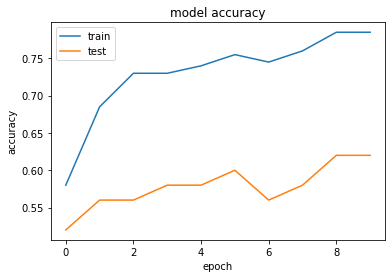

In [27]:
plt.plot(feat_adam_model.history['accuracy'])
plt.plot(feat_adam_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

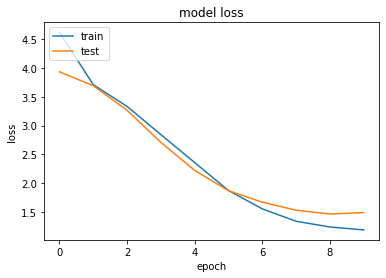

In [28]:
plt.plot(feat_adam_model.history['loss'])
plt.plot(feat_adam_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
pred3=model3.predict(df_test)

In [30]:
submit5=pd.read_csv("sample_submission.csv")
submit5['target']=pred3

x5=submit5.to_csv("mlp_adam_feat.csv",index=False)

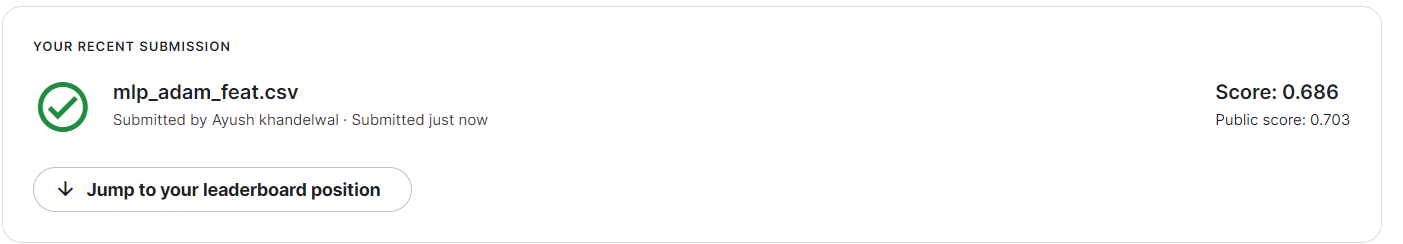

In [31]:
input1=df_train.shape[1]

model4 = keras.Sequential()

model4.add(keras.layers.Dense(16,input_dim=input1,activation="relu",kernel_initializer=tf.keras.initializers.he_normal(),
                           kernel_regularizer=tf.keras.regularizers.l1()))
model4.add(keras.layers.Dropout(0.4))

model4.add(keras.layers.Dense(8, activation="relu",kernel_initializer=tf.keras.initializers.he_normal(),
                            kernel_regularizer=tf.keras.regularizers.l1()))
model4.add(keras.layers.Dropout(0.4))

model4.add(keras.layers.Dense(1, activation="sigmoid",kernel_initializer=tf.keras.initializers.he_normal()))

model4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
model4.compile(optimizer=optimizer_rms, loss='binary_crossentropy', metrics=['accuracy'])

feat_model_rms=model4.fit(x=df_train, y=y_train,batch_size=32,epochs=200,validation_split=0.2,callbacks=[earlystop],shuffle=True)

Epoch 1/200
7/7 [==============================] - 1s 19ms/step - loss: 4.0162 - accuracy: 0.5450 - val_loss: 3.3477 - val_accuracy: 0.5400
Epoch 2/200
7/7 [==============================] - 0s 4ms/step - loss: 2.9249 - accuracy: 0.6300 - val_loss: 2.5400 - val_accuracy: 0.5600
Epoch 3/200
7/7 [==============================] - 0s 4ms/step - loss: 2.1416 - accuracy: 0.7250 - val_loss: 2.1000 - val_accuracy: 0.6400
Epoch 4/200
7/7 [==============================] - 0s 4ms/step - loss: 1.7016 - accuracy: 0.7750 - val_loss: 1.8824 - val_accuracy: 0.6000
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 1.4965 - accuracy: 0.7750 - val_loss: 1.5630 - val_accuracy: 0.5800
Epoch 6/200
7/7 [==============================] - 0s 4ms/step - loss: 1.3873 - accuracy: 0.7300 - val_loss: 1.5668 - val_accuracy: 0.6200
Epoch 7/200
7/7 [==============================] - 0s 4ms/step - loss: 1.2818 - accuracy: 0.7600 - val_loss: 1.3147 - val_accuracy: 0.6400
Epoch 8/200
7/7 [=========

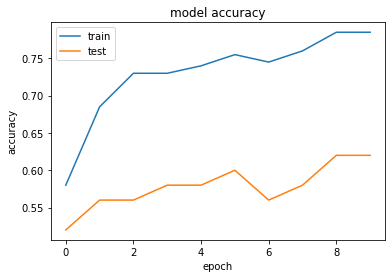

In [33]:
plt.plot(feat_adam_model.history['accuracy'])
plt.plot(feat_adam_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

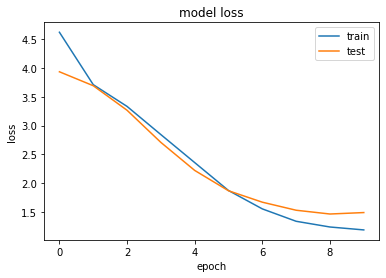

In [34]:
plt.plot(feat_adam_model.history['loss'])
plt.plot(feat_adam_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [35]:
pred4=model4.predict(df_test)

In [36]:
submit5=pd.read_csv("sample_submission.csv")
submit5['target']=pred4

x5=submit5.to_csv("mlp_rms_feat.csv",index=False)

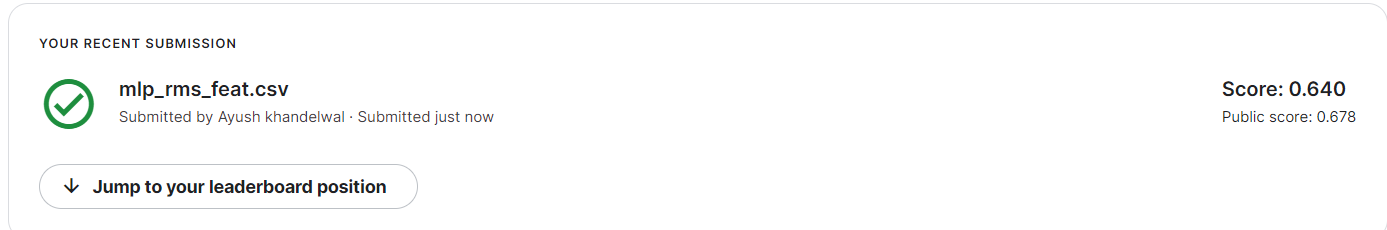